<a href="https://colab.research.google.com/github/katherinelynne/Python-Portfolio/blob/main/Product_and_Retail_Analytics.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Data Cleaning and Preparation

**About the Data** The company is UK based and it is a non-store online retailer. They sell mainly occasion gifts. Most of the customers are wholesalesrs who are both local and international. The transactions in this data set are between the date ranges of 12/1/2010 - 12/9/2011


In [2]:
! pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)

/bin/bash: -c: line 0: syntax error near unexpected token `('
/bin/bash: -c: line 0: ` pip install [https://github.com/pandas-profiling/pandas-profiling/archive/master.zip](https://github.com/pandas-profiling/pandas-profiling/archive/master.zip)'


In [16]:
#Below are the modules I will use for this data.

import pandas as pd

import numpy as np

import matplotlib.pyplot as plt

import seaborn as sns


import warnings
#The current version of seaborn generates a bunch of warnings that I'll ignore.
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#Import missingmno and name it msno this is the # of missing data visualization module for Python

import pandas_profiling


import gc

import datetime

%matplotlib inline
#Using ggplots style
plt.style.use('ggplot')

In [3]:
#Below are the modules I will use for this data.
!pip install pandas
import pandas as pd
!pip install numpy
import numpy as np
!pip install matplotlib.pyplot
import matplotlib.pyplot as plt
!pip install seaborn
import seaborn as sns

!pip install warnings
import warnings
#The current version of seaborn generates a bunch of warnings that I'll ignore.
warnings.filterwarnings('ignore')
sns.set_style('whitegrid')

#Import missingmno and name it msno this is the # of missing data visualization module for Python
!pip install pandas_profiling
import pandas_profiling

!pip install gc
import gc
!pip install datetime
import datetime

%matplotlib inline
#Using ggplots style
plt.style.use('ggplot')


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement matplotlib.pyplot (from versions: none)
ERROR: No matching distribution found for matplotlib.pyplot
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement warnings (from versions: none)
ERROR: No matching distribution found for warnings
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 324.4/324.4 kB 17.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
ERROR: Could not find a version that satisfies the requirement gc (from versions: none)
ERROR: No matching distribution found for gc
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 52.1/52.1 kB 5.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 246.1/246.1 kB 23.0 MB/s eta 0:00:00


In [17]:

import pandas as pd

In [18]:
from matplotlib.cbook import file_requires_unicode

# Loading our data
# Specifying encoding to deal with different formats

#df= pd.read.csv('./data/ecommerce/data.csv', encoding = 'ISO-8859-1')

# Download and unzip the file
from urllib.request import urlopen
from zipfile import ZipFile

zipurl='https://github.com/rajeevratan84/datascienceforbusiness/blob/master/ecommerce_data.zip?raw=true'
zipresp = urlopen(zipurl) #Create a new file on the harddrive
tempzip = open("/tmp/tempfile.zip", "wb") # Wite the contents of the downloaded file into the new file
tempzip.write(zipresp.read()) # Close the newly created file
tempzip.close() # re-open the newly-created file with ZipFile()
zf = ZipFile("/tmp/tempfile.zip") # Extracts its contents into <extraction_path>
zf.extractall(path = '') # note that extractall will automatically create the path, left blank so its in working directory
# Close the ZipFile instance
zf.close()

df = pd.read_csv("ecommerce_data.csv", encoding='ISO-8859-1')

In [4]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom


In [12]:
# Check the info to make sure everything is correct
# I find that InvoiceDate is an object and I want that to be a time data type
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [11]:
# Check the missing values for each column
df.isnull().sum().sort_values(ascending=False)

CustomerID     135080
Description      1454
InvoiceNo           0
StockCode           0
Quantity            0
InvoiceDate         0
UnitPrice           0
Country             0
dtype: int64

In [10]:
# Checking the rows with missing values
df[df.isnull().any(axis=1)].head(10)

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
622,536414,22139,NaN,56,2010-12-01 11:52:00,0.00,NaN,United Kingdom
1443,536544,21773,DECORATIVE ROSE BATHROOM BOTTLE,1,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1444,536544,21774,DECORATIVE CATS BATHROOM BOTTLE,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1445,536544,21786,POLKADOT RAIN HAT,4,2010-12-01 14:32:00,0.85,NaN,United Kingdom
1446,536544,21787,RAIN PONCHO RETROSPOT,2,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1447,536544,21790,VINTAGE SNAP CARDS,9,2010-12-01 14:32:00,1.66,NaN,United Kingdom
1448,536544,21791,VINTAGE HEADS AND TAILS CARD GAME,2,2010-12-01 14:32:00,2.51,NaN,United Kingdom
1449,536544,21801,CHRISTMAS TREE DECORATION WITH BELL,10,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1450,536544,21802,CHRISTMAS TREE HEART DECORATION,9,2010-12-01 14:32:00,0.43,NaN,United Kingdom
1451,536544,21803,CHRISTMAS TREE STAR DECORATION,11,2010-12-01 14:32:00,0.43,NaN,United Kingdom


In [5]:
# Change the invoice_date format - String to timestamp format
df['InvoiceDate'] = pd.to_datetime(df.InvoiceDate, format='%m/%d/%Y %H:%M')
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [6]:
# Now lets do Time series operations
# df_new without missing values
df_no_missing = df.dropna()

In [8]:
# Check missing values for each column
df_no_missing.isnull().sum().sort_values(ascending=False)

InvoiceNo      0
StockCode      0
Description    0
Quantity       0
InvoiceDate    0
UnitPrice      0
CustomerID     0
Country        0
dtype: int64

In [9]:
# Convert String to Int type because Customer ID doesnt need to be a float
df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')
df_no_missing.head()

<ipython-input-9-1d8fdfefe8b2>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_no_missing['CustomerID'] = df_no_missing['CustomerID'].astype('int64')


,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom


In [13]:
# Rename the dataframs to make code more readable
df2 = df_no_missing.copy()
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,406829.00,406829.00,406829.00
mean,12.06,3.46,15287.69
std,248.69,69.32,1713.60
min,-80995.00,0.00,12346.00
25%,2.00,1.25,13953.00
50%,5.00,1.95,15152.00
75%,12.00,3.75,16791.00
max,80995.00,38970.00,18287.00


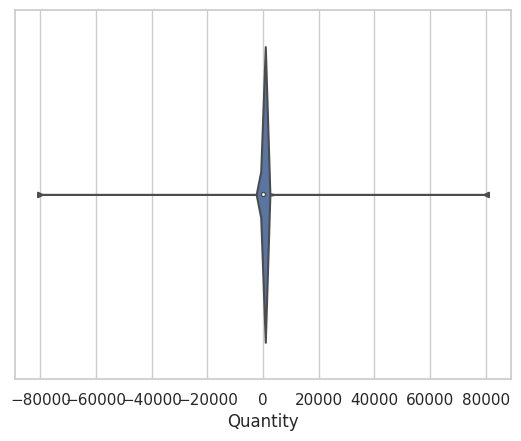

In [19]:
# violin plot for quantities
sns.set(style="whitegrid")
ax = sns.violinplot(x=df2["Quantity"])

We can see all of the data is centered in the middle but there are peaks on either side so maybe we can remove the negative values from the left side.

In [20]:
# Remove negative quantities

df2 = df2[df2.Quantity > 0]
df2.describe().round(2)

,Quantity,UnitPrice,CustomerID
count,397924.00,397924.00,397924.00
mean,13.02,3.12,15294.32
std,180.42,22.10,1713.17
min,1.00,0.00,12346.00
25%,2.00,1.25,13969.00
50%,6.00,1.95,15159.00
75%,12.00,3.75,16795.00
max,80995.00,8142.75,18287.00


Now we see 1 as expected and there are no negative values. But lets double check with the violin plots.

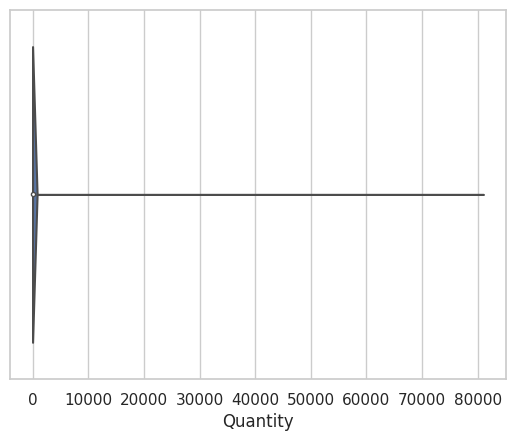

In [21]:
ax = sns.violinplot(x=df2["Quantity"])

In [22]:
# Lets work out the amounts by creating a new column called "amount spent" and it multiplies unit price by quantitity.
df2['AmountSpent'] = df2['Quantity'] * df2['UnitPrice']
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34


In [23]:
# Adding Month Day and Hour columns that we will use for further analysis
# Starting with Year_Month first
# Take Invoice Date and extract the month and create a new field  
df2['Year_Month'] = df2['InvoiceDate'].dt.to_period('M')
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12


In [24]:
# Re-create new columns for the below. We're going to see some analysis on how much things have sold per month, day of week etc. so We need to create L first.
# Below is getting the invoice date for each item below.
# Run L through the below loop and then join it back together. 

L = ['year', 'month', 'day', 'dayofweek', 'dayofyear', 'weekofyear', 'quarter']
df2 = df2.join(pd.concat((getattr(df2['InvoiceDate'].dt, i).rename(i) for i in L), axis=1))
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,2,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,2,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,2,335,48,4


In [25]:
df2.dayofweek.unique()

array([2, 3, 4, 6, 0, 1])

We can see above that day of week starts with 0 so Sunday is 0 and we will fix that later on. For now, lets check our data types.

In [26]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397924 entries, 0 to 541908
Data columns (total 17 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397924 non-null  object        
 1   StockCode    397924 non-null  object        
 2   Description  397924 non-null  object        
 3   Quantity     397924 non-null  int64         
 4   InvoiceDate  397924 non-null  datetime64[ns]
 5   UnitPrice    397924 non-null  float64       
 6   CustomerID   397924 non-null  int64         
 7   Country      397924 non-null  object        
 8   AmountSpent  397924 non-null  float64       
 9   Year_Month   397924 non-null  period[M]     
 10  year         397924 non-null  int64         
 11  month        397924 non-null  int64         
 12  day          397924 non-null  int64         
 13  dayofweek    397924 non-null  int64         
 14  dayofyear    397924 non-null  int64         
 15  weekofyear   397924 non-null  int6

In [27]:
# Now add 1 to each day of the week so Sunday can be 1
df2['dayofweek'] = df2['dayofweek'] + 1
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


# Sales and Revenue Analysis

In [28]:
# Consolidating the number of Sales made per customer for each country
# We use InvoiceNo as the count for Sales
# We take our DF and group by customer ID and country, and we dont want to use the index, then we count invoice number
# which counts as a sale and ascending=false will ensure the highest values appear first.
sales_per_cust = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count().sort_values(by='InvoiceNo', ascending=False)
sales_per_cust.columns = ['CustomerID', 'Country', "NumberofSales"]
sales_per_cust.head(10)

,CustomerID,Country,NumberofSales
4019,17841,United Kingdom,7847
1888,14911,EIRE,5677
1298,14096,United Kingdom,5111
334,12748,United Kingdom,4596
1670,14606,United Kingdom,2700
2185,15311,United Kingdom,2379
1698,14646,Netherlands,2080
570,13089,United Kingdom,1818
699,13263,United Kingdom,1677
1443,14298,United Kingdom,1637


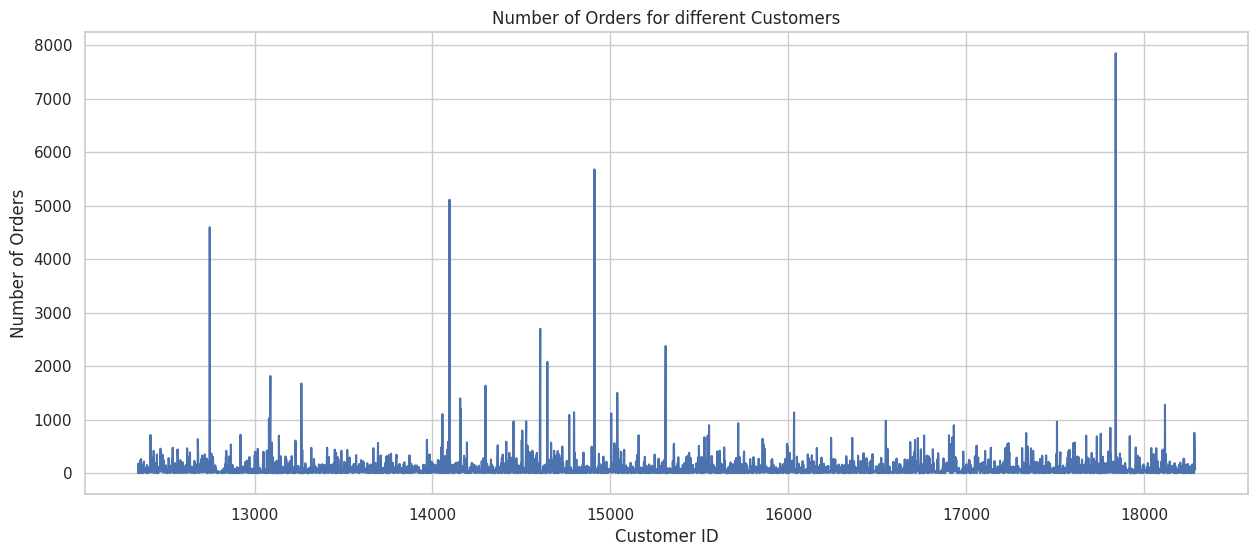

In [29]:
# Visualizing number of sales for all customers

orders = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['InvoiceNo'].count()

plt.subplots(figsize=(15,6))
plt.plot(orders.CustomerID, orders.InvoiceNo)
plt.xlabel('Customer ID')
plt.ylabel('Number of Orders')
plt.title('Number of Orders for different Customers')
plt.show()

Who are these people, who are the best customers? We can see these customers rank in height compared to other in terms of volume of sales. Volume of sales or number isnt the best way to look at this, we may want to see the amount spent per customer.

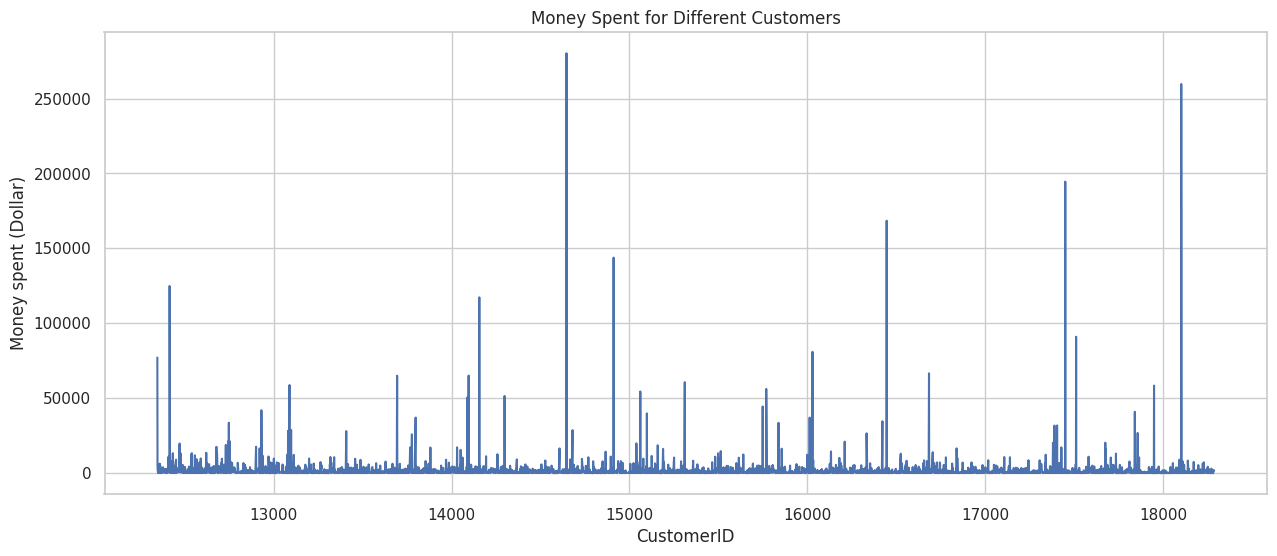

In [30]:
# Visualizing money spent for all customers
money_spent = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum()

plt.subplots(figsize=(15,6))
plt.plot(money_spent.CustomerID, money_spent.AmountSpent)
plt.xlabel('CustomerID')
plt.ylabel('Money spent (Dollar)')
plt.title('Money Spent for Different Customers')
plt.show()

In [31]:
# Consolidate the number of sales made per customer (Revenue)
# We use index=False to indicate the groupby that we dont want to set the customer ID as index
# Here, we can see how much money the highest spending customers actually spent overall
spent_per_cust = df2.groupby(by=['CustomerID', 'Country'], as_index=False)['AmountSpent'].sum().sort_values(by='AmountSpent', ascending=False)
spent_per_cust.columns = ['CustomerID', 'Country', "TotalSpent"]
spent_per_cust.head(10)

,CustomerID,Country,TotalSpent
1698,14646,Netherlands,280206.02
4210,18102,United Kingdom,259657.30
3737,17450,United Kingdom,194550.79
3017,16446,United Kingdom,168472.50
1888,14911,EIRE,143825.06
57,12415,Australia,124914.53
1342,14156,EIRE,117379.63
3780,17511,United Kingdom,91062.38
2711,16029,United Kingdom,81024.84
0,12346,United Kingdom,77183.60


Purchasing Patterns

In [32]:
# Check our data and make sure evetything is okay
df2.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


In [33]:
# Insert a new column as out 3rd row (index 2) with year_month by joining our yea with month from our InvoiceDate field
# We take the year and multiply by 100 to get a 2010 format plus the month and because it acts like a string data type here it appends each other opposed to actually adding 12 to 2,010
df2.insert(loc=2, column= 'year_month', value=df2['InvoiceDate'].map(lambda x: 100*x.year + x.month))

# Insert a new column as our 6th column (index 5) with our Hour extracted from InvoiceDate
df2.insert(loc=5, column='hour', value=df2.InvoiceDate.dt.hour)

In [34]:
# Check to see if our year_month and hour columns were made
df2.head()

,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
0,536365,85123A,201012,WHITE HANGING HEART T-LIGHT HOLDER,6,8,2010-12-01 08:26:00,2.55,17850,United Kingdom,15.30,2010-12,2010,12,1,3,335,48,4
1,536365,71053,201012,WHITE METAL LANTERN,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
2,536365,84406B,201012,CREAM CUPID HEARTS COAT HANGER,8,8,2010-12-01 08:26:00,2.75,17850,United Kingdom,22.00,2010-12,2010,12,1,3,335,48,4
3,536365,84029G,201012,KNITTED UNION FLAG HOT WATER BOTTLE,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4
4,536365,84029E,201012,RED WOOLLY HOTTIE WHITE HEART.,6,8,2010-12-01 08:26:00,3.39,17850,United Kingdom,20.34,2010-12,2010,12,1,3,335,48,4


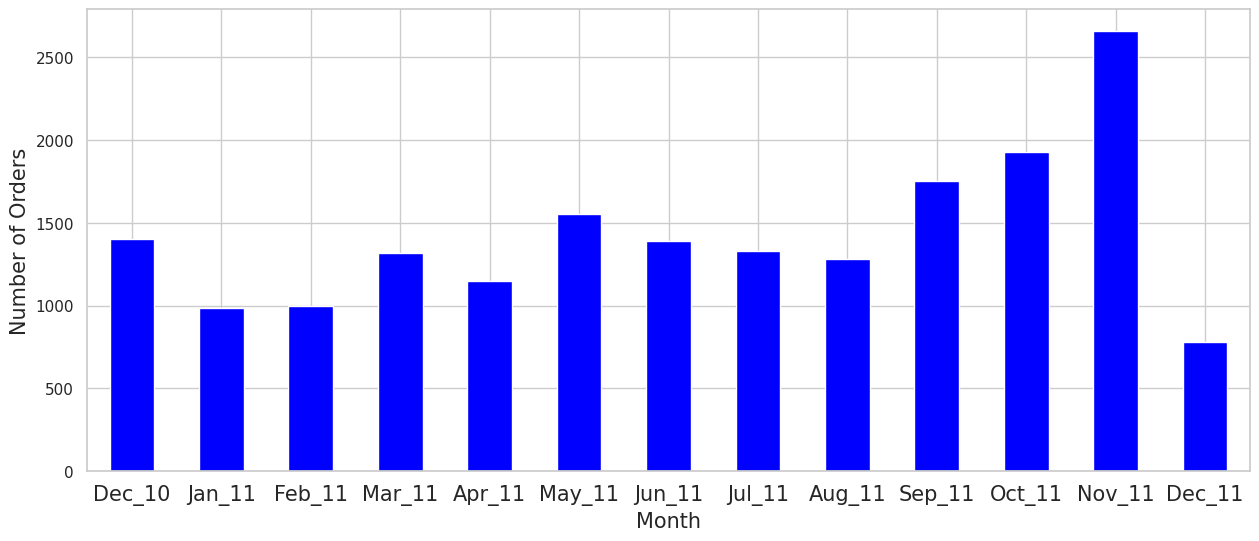

In [62]:
# Create a plot that shows the number of orders per month
# We group by invoiceNo because that is how we will count the number of orders, doesnt matter how many items are on the invoice, one invoice = one number.
# We group by year month and get the distinct counts
import seaborn as sns
ax = df2.groupby('InvoiceNo')['year_month'].unique().value_counts().sort_index().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel('Month', fontsize=15)
ax.set_ylabel('Number of Orders', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11','Apr_11','May_11','Jun_11','Jul_11','Aug_11','Sep_11','Oct_11','Nov_11','Dec_11'), rotation='horizontal',fontsize=15)
plt.show()


In [56]:
# Let's see number of orders per day of the week, this tells us the the 4th day of the week has the highest
df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index()

[1]    2863
[2]    3185
[3]    3455
[4]    4033
[5]    2831
[7]    2169
Name: dayofweek, dtype: int64

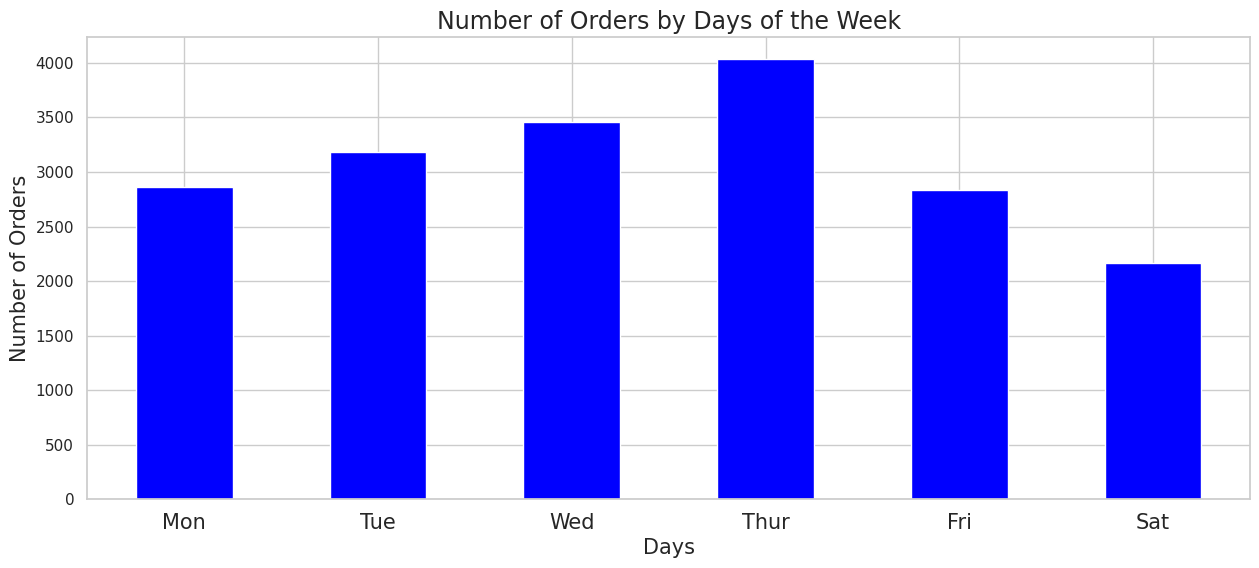

In [68]:
# Create a plot for the number of order per day of the week
ax = df2.groupby('InvoiceNo')['dayofweek'].unique().value_counts().sort_index().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel('Days',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title("Number of Orders by Days of the Week",fontsize=17)
ax.set_xticklabels(('Mon', 'Tue', 'Wed', 'Thur', 'Fri', 'Sat'), rotation='horizontal',fontsize=15)
plt.show()

In [41]:
df2.columns

Index(['InvoiceNo', 'StockCode', 'year_month', 'Description', 'Quantity',
       'hour', 'InvoiceDate', 'UnitPrice', 'CustomerID', 'Country',
       'AmountSpent', 'Year_Month', 'year', 'month', 'day', 'dayofweek',
       'dayofyear', 'weekofyear', 'quarter'],
      dtype='object')

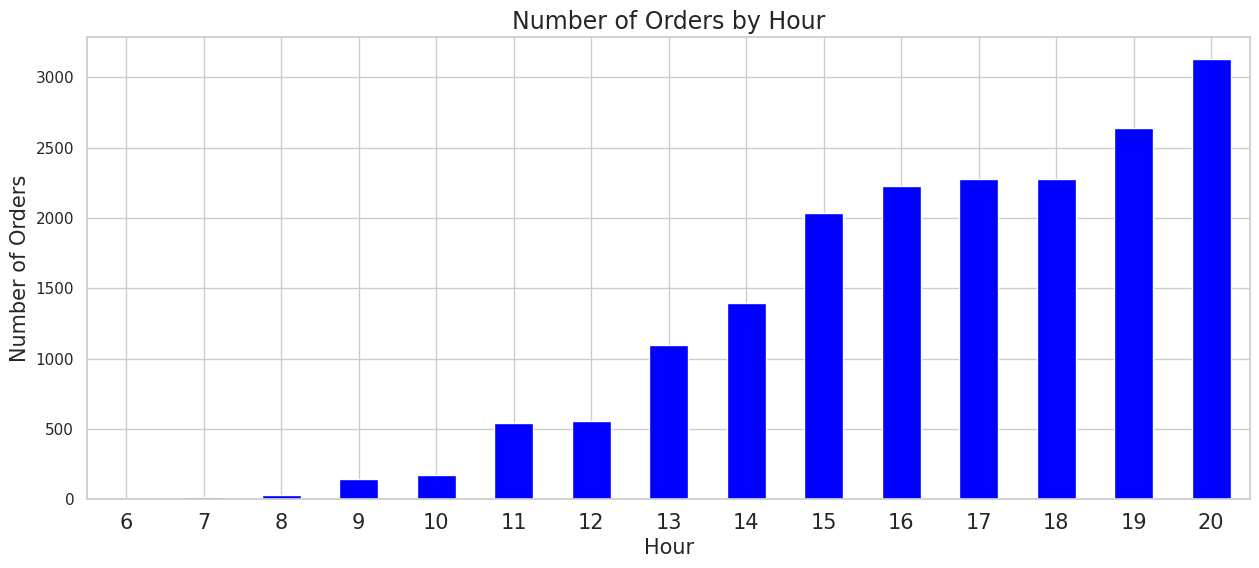

In [83]:
# Plotting the number of orders per hour (using our newly created 'hour' column)
# This could be useful for a team who wants to know when a support analyst would be most needed at which points in the day
ax = df2.groupby('InvoiceNo')['hour'].unique().value_counts().iloc[:-1].sort_values().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders',fontsize=15)
ax.set_title('Number of Orders by Hour',fontsize=17)
ax.set_xticklabels(range(6, 21), rotation='horizontal', fontsize=15)
plt.show()

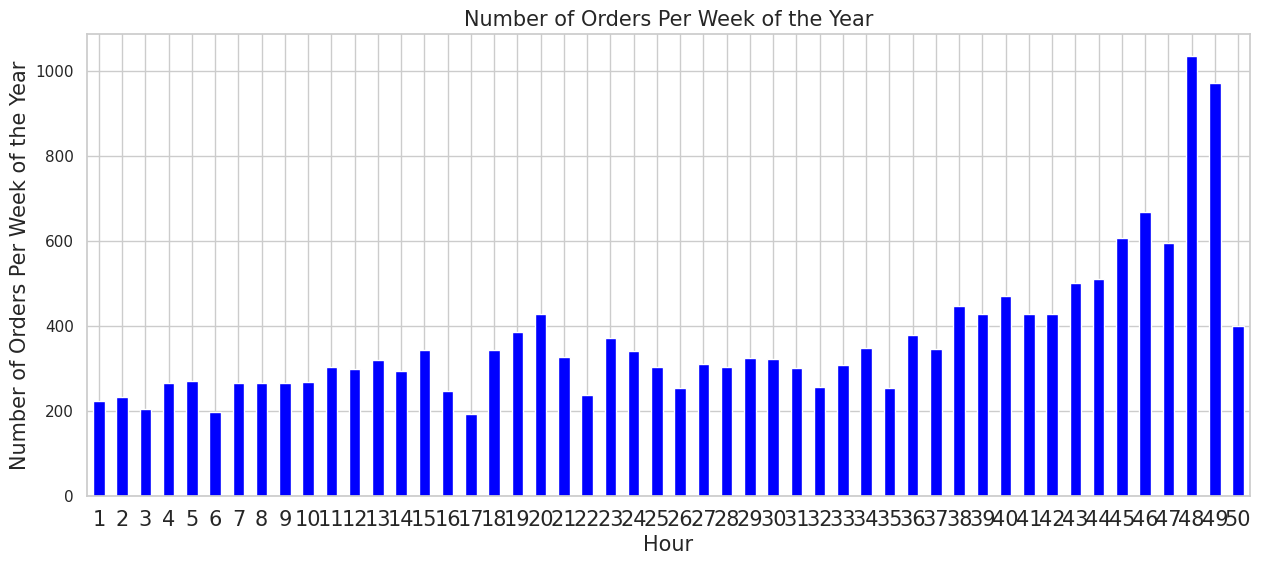

In [78]:
# Number of sales per week of the year
ax = df2.groupby('InvoiceNo')['weekofyear'].unique().value_counts().iloc[:-1].sort_index().plot(kind='bar', color='blue', figsize=(15,6))
ax.set_xlabel('Hour',fontsize=15)
ax.set_ylabel('Number of Orders Per Week of the Year',fontsize=15)
ax.set_title('Number of Orders Per Week of the Year',fontsize=15)
ax.set_xticklabels(range(1, 51), rotation='horizontal', fontsize=15)
plt.show()

Analyze Unit Prices of our Items

In [84]:
df2.UnitPrice.describe()

count    397924.000000
mean          3.116174
std          22.096788
min           0.000000
25%           1.250000
50%           1.950000
75%           3.750000
max        8142.750000
Name: UnitPrice, dtype: float64

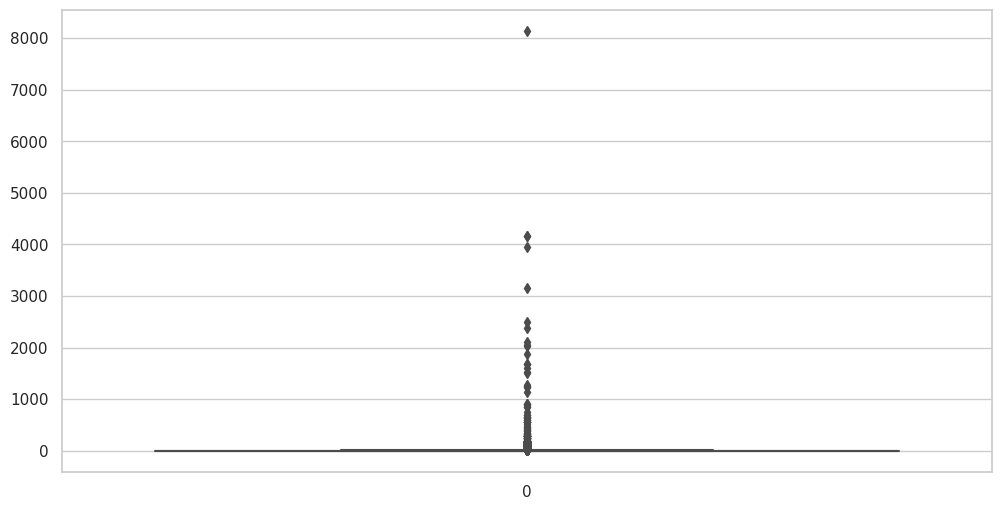

In [86]:
# Check the distribution of unit price
plt.subplots(figsize=(12,6))
sns.boxplot(df2.UnitPrice)
plt.show()

In [88]:
# We know there are some free items so lets see those
df_free_items = df2[df2.UnitPrice == 0]
print(len(df_free_items))
df_free_items.head()

40


,InvoiceNo,StockCode,year_month,Description,Quantity,hour,InvoiceDate,UnitPrice,CustomerID,Country,AmountSpent,Year_Month,year,month,day,dayofweek,dayofyear,weekofyear,quarter
9302,537197,22841,201012,ROUND CAKE TIN VINTAGE GREEN,1,14,2010-12-05 14:02:00,0.0,12647,Germany,0.0,2010-12,2010,12,5,7,339,48,4
33576,539263,22580,201012,ADVENT CALENDAR GINGHAM SACK,4,14,2010-12-16 14:36:00,0.0,16560,United Kingdom,0.0,2010-12,2010,12,16,4,350,50,4
40089,539722,22423,201012,REGENCY CAKESTAND 3 TIER,10,13,2010-12-21 13:45:00,0.0,14911,EIRE,0.0,2010-12,2010,12,21,2,355,51,4
47068,540372,22090,201101,PAPER BUNTING RETROSPOT,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1
47070,540372,22553,201101,PLASTERS IN TIN SKULLS,24,16,2011-01-06 16:41:00,0.0,13081,United Kingdom,0.0,2011-01,2011,1,6,4,6,1,1


In [89]:
# See when these items were given out
df_free_items.year_month.value_counts().sort_index()

201012     3
201101     3
201102     1
201103     2
201104     2
201105     2
201107     2
201108     6
201109     2
201110     3
201111    14
Name: year_month, dtype: int64

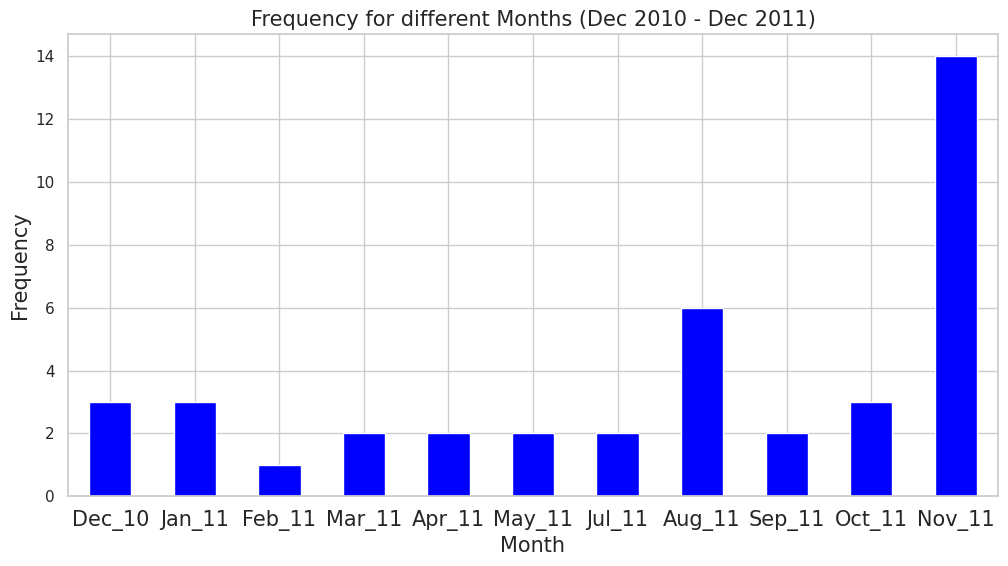

In [96]:
# Plotting the above
ax = df_free_items.year_month.value_counts().sort_index().plot(kind='bar',figsize=(12,6), color='blue')
ax.set_xlabel('Month',fontsize=15)
ax.set_ylabel('Frequency',fontsize=15)
ax.set_title('Frequency for different Months (Dec 2010 - Dec 2011)', fontsize=15)
ax.set_xticklabels(('Dec_10', 'Jan_11', 'Feb_11', 'Mar_11','Apr_11','May_11','Jul_11','Aug_11','Sep_11','Oct_11','Nov_11'), rotation='horizontal',fontsize=15)
plt.show()

On average, the company gave out 2-4 times FREE items to customers each month (Except in June2011)

Analysis Per Country

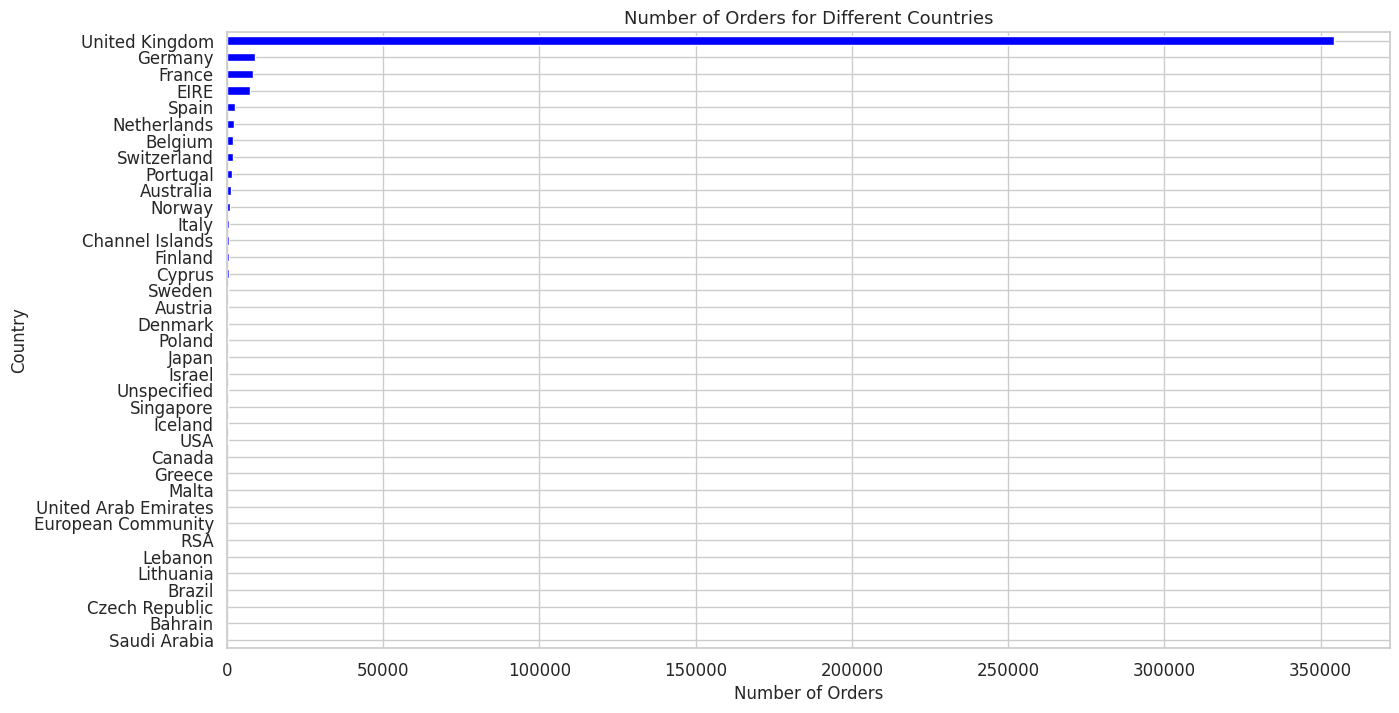

In [99]:
group_country_orders = df2.groupby('Country')['InvoiceDate'].count().sort_values()

# Plot number of distinct customers in each country (with UK)
plt.subplots(figsize=(15,8))
group_country_orders.plot(kind='barh',fontsize=12, color='blue')
plt.xlabel('Number of Orders', fontsize=12)
plt.ylabel('Country',fontsize=12)
plt.title('Number of Orders for Different Countries',fontsize=13)
plt.show()